<a href="https://colab.research.google.com/github/yeondub1121/prac-colab/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cuda:0
0.14543139934539795
0.04208843782544136
0.029169688001275063
0.02259078063070774
0.020108938217163086
0.018118316307663918
0.017307497560977936
0.01648811250925064
0.01575973443686962
0.015153731219470501
torch.Size([96, 28, 28])


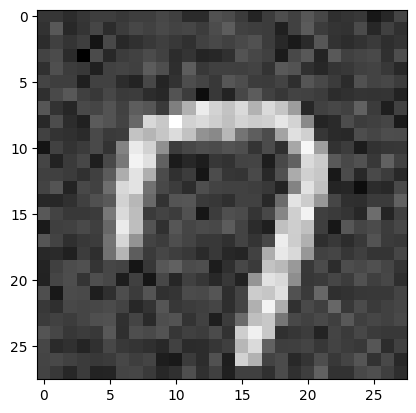

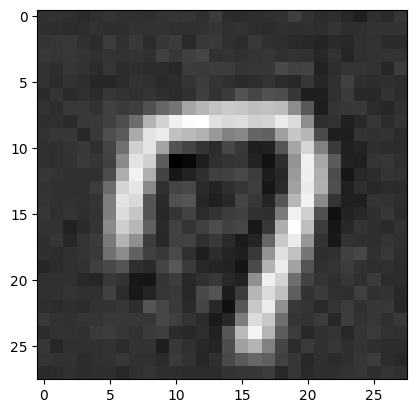

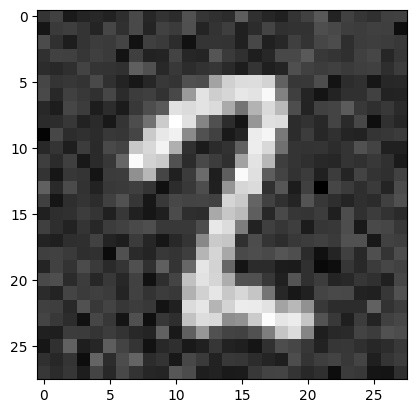

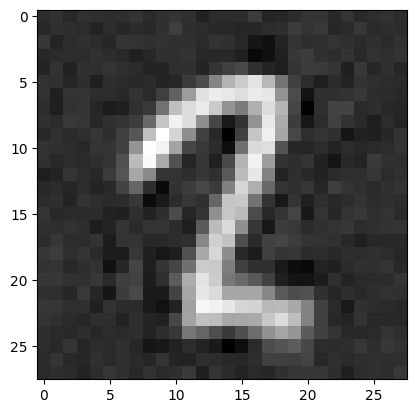

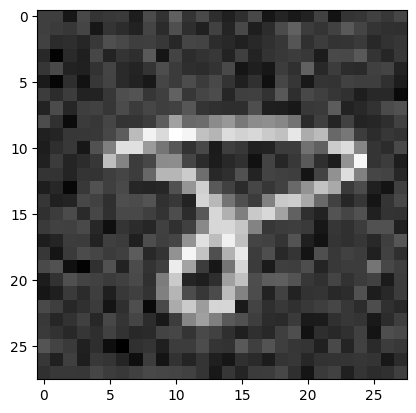

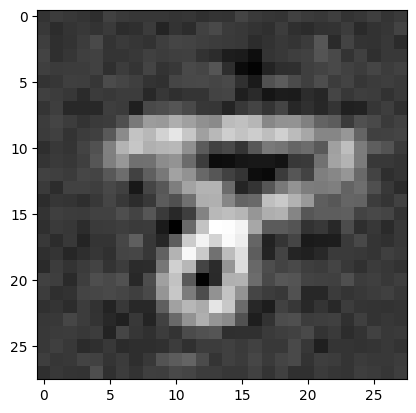

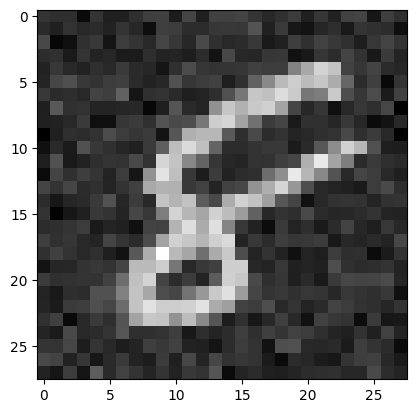

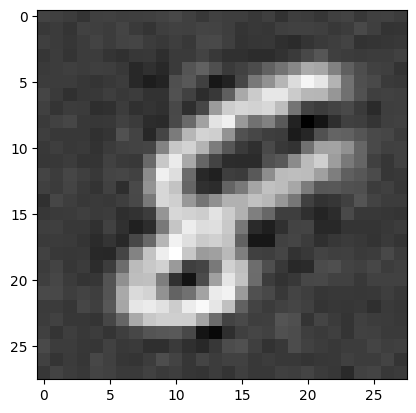

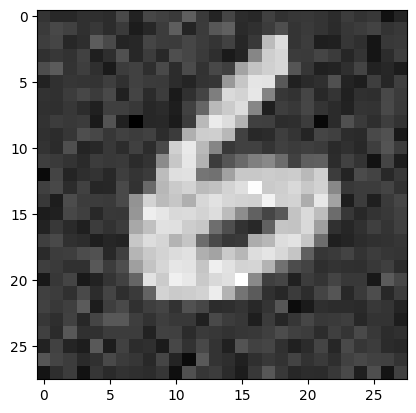

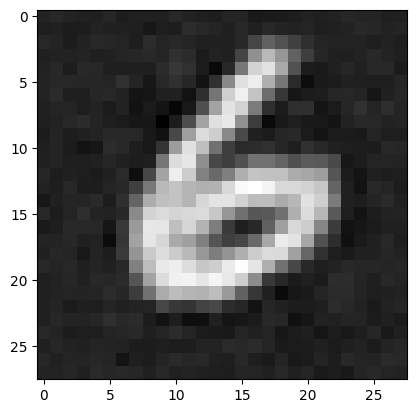

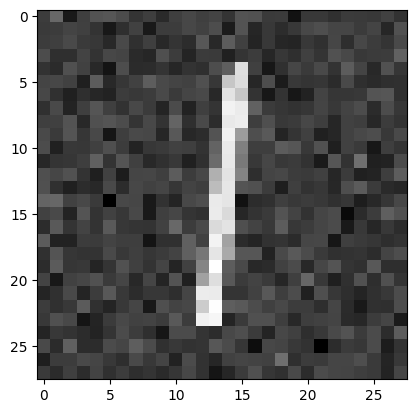

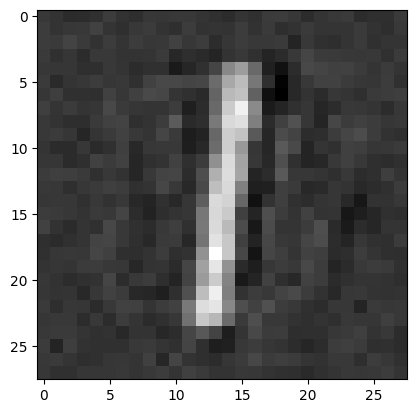

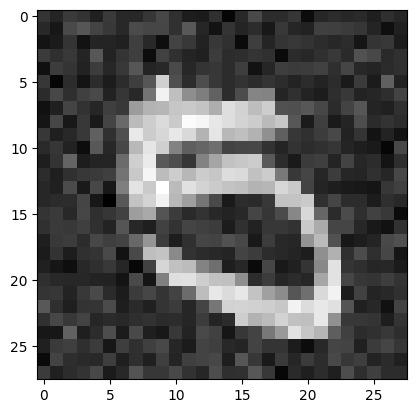

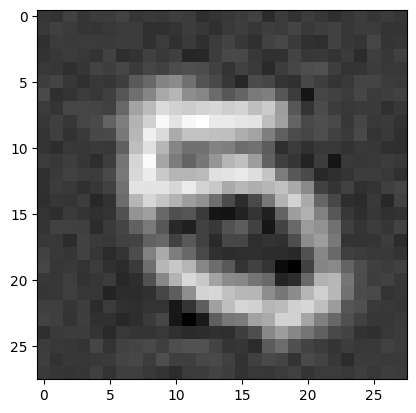

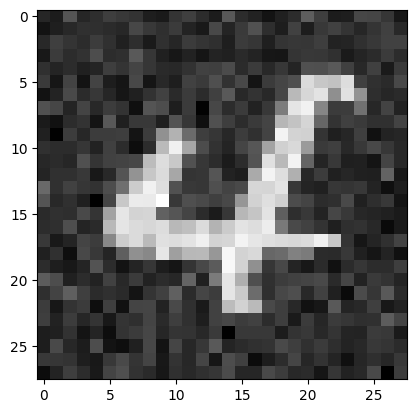

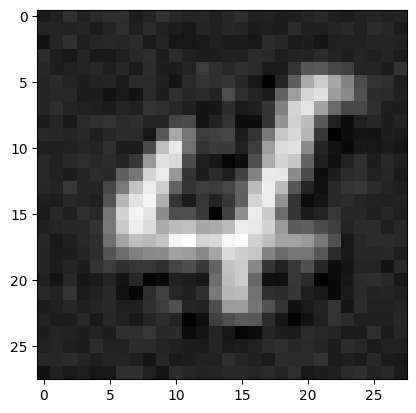

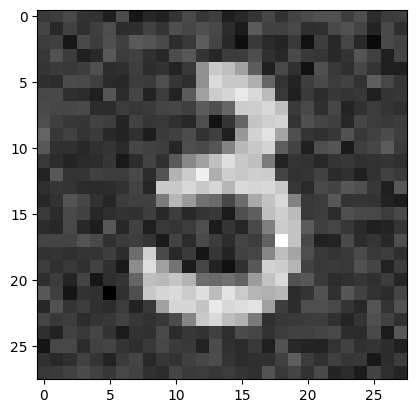

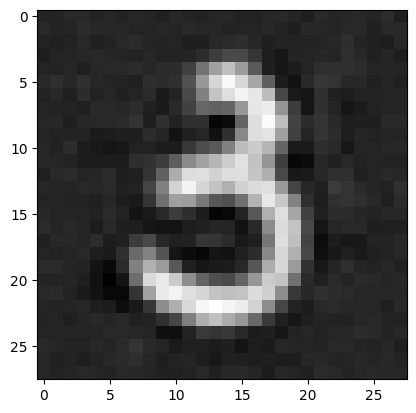

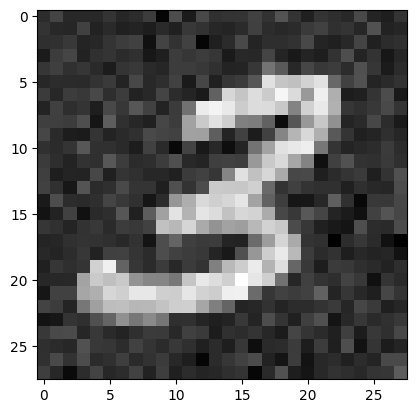

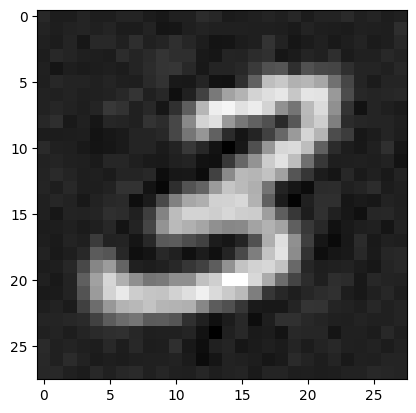

tensor(0.0151, device='cuda:0', grad_fn=<MseLossBackward0>)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Hyperparameters
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

# Load MNIST dataset
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Autoencoder Model with 256-128-256 node structure
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28 * 28, 128)
        self.decoder = nn.Linear(128, 28 * 28)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(-1, 1, 28, 28)
        return out


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

noise = torch.nn.init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)


loss_arr = []
for epoch in range(num_epoch):
    for i, (image, _) in enumerate(train_loader):
        noise = torch.normal(0, 0.1, size=image.size())  # Add noise to the input image
        image = image + noise
        image = image.to(device)

        optimizer.zero_grad()
        output = model(image)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        if i % 1000 == 0:
            print(loss.item())  # Print loss value
            loss_arr.append(loss.item())


out_img=torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).cpu().detach().numpy(), cmap='gray')  # Modify this line
    plt.show()
    plt.imshow(out_img[i].cpu().detach().numpy(), cmap='gray')  # This line should be fine
    plt.show()

with torch.no_grad():
  for i in range(1):
    for j,[image,label] in enumerate(test_loader):
      x=image.to(device)

      optimizer.zero_grad()
      output=model.forward(x)

      if j %1000==0:
        print(loss)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/인공지능 실습"

/content/drive/My Drive/인공지능 실습


In [ ]:
!git clone https://github.com/yeondub1121/prac-colab.git

Cloning into 'prac-colab'...
